# Fisherova-Kolmogorovova radiálně symetrická rovnice



In [1]:
import pde
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [10, 10]

- řešení pomocí FDM a balíku py-pde
- mřížka na které řeším je 2D čtverec, velikost 1000 x 1000

Strašně moc zááleží na parametrech, jak se výsledné řešení bude chovat. Ta vlna se nejdříve přizpůsobí cílovému tvaru (tady se může i zmenšit) a pak se zvětší a rozjede do stran:

domain_size = 50.
grid_size = 300
#dx = domain_size/(grid_size+1)

max_time= 10
dt = 0.005
tracker_int = 0.1

iv_size = 20 



kde mi to taky fungovalo hezky:

domain_size = 50.
grid_size = 300
#dx = domain_size/(grid_size+1)

max_time= 10
dt = 0.005
tracker_int = 0.01

iv_size = 40 


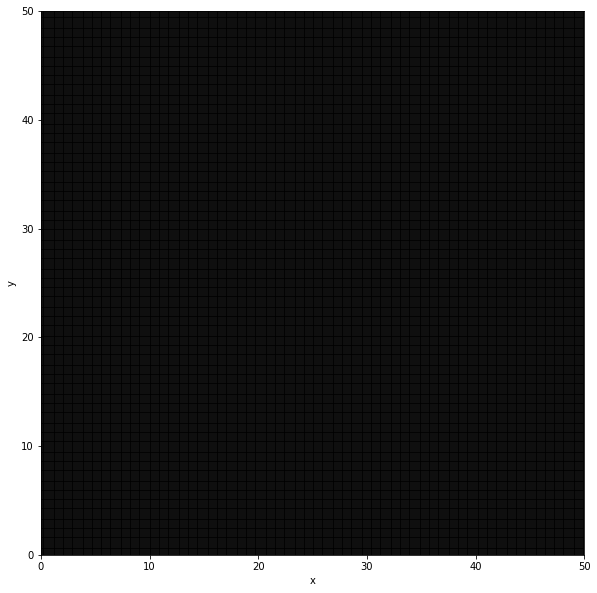

In [19]:
# příprava gridu
domain_size = 50.
grid_size = 300
#dx = domain_size/(grid_size+1)

max_time= 10
dt = 0.005
tracker_int = 0.1

iv_size = 40 #  průměr radiálně symetrické počáteční podmínky

grid = pde.CartesianGrid([[0, domain_size]]*2, grid_size)
grid.plot(action='show')

- počáteční podmínka je radiálně symetrická
- použiju bump function (https://en.wikipedia.org/wiki/Bump_function), protože je hezká :-) Klidně můžu ale na kruhu použít jen konstantu, funguje podobně

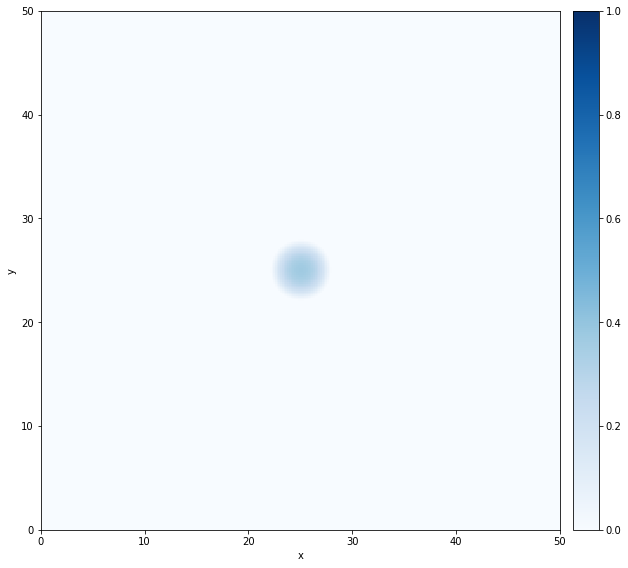

In [20]:
# počáteční podmínka na 2d CartesianGrid

X = np.linspace(-1.,1.,iv_size)
Y = np.linspace(-1.,1.,iv_size)
Z = np.zeros((iv_size,iv_size))


for i in range(0,iv_size): 
    for j in range(0,iv_size):
        if X[i]**2+Y[j]**2<1:
            Z[i,j] = np.exp(-1/(1-X[i]**2-Y[j]**2))

x0 = np.zeros(grid.shape)
lo = int((grid_size - iv_size)/2)
hi = lo+iv_size
x0[lo:hi, lo:hi] = Z



state = pde.ScalarField(grid,x0)
state.plot(action='show',cmap="Blues", clim=(0,1));

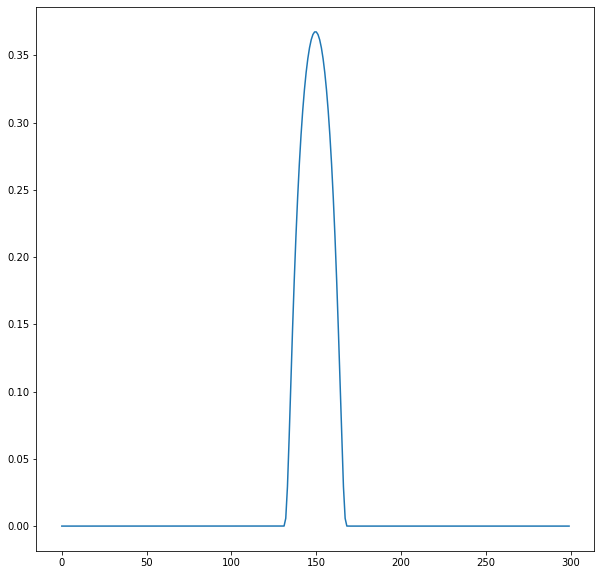

In [21]:
plt.plot(state.data[int(grid_size/2)])

- řešení rovnice

In [22]:
#řešení rovnice
eq = pde.PDE(
    {"u": "laplace(u) + u*(1-u)"},
)

storage = pde.MemoryStorage()
tracker = ['progress', storage.tracker(interval=tracker_int)] 

result = eq.solve(state, t_range=max_time, dt=dt, tracker=tracker)



#pde.movie(storage, "f-k.mov", dpi=200, plot_args={'cmap':'Blues', 'vmin':'0', 'vmax':'1'})


In [125]:
pde.movie_scalar(storage,"f-k-s.mov")

Output()

In [192]:
from IPython.display import Video
Video('./f-k.mov', width=700)

In [7]:
t_size = len(storage.data)-1
def plot_wave(t):
    
    #x_size = len(storage.data[t][int(grid_size/2)])
    x = np.linspace(0, domain_size, grid_size)#x_size)
    plt.plot(x,storage.data[t][int(grid_size/2)])
    plt.xlim([0,domain_size])
    plt.ylim([0,1.1])
    plt.show()

widgets.interactive(plot_wave, t=widgets.IntSlider(min=0, max=t_size, step=1, value=0))


interactive(children=(IntSlider(value=0, description='t'), Output()), _dom_classes=('widget-interact',))

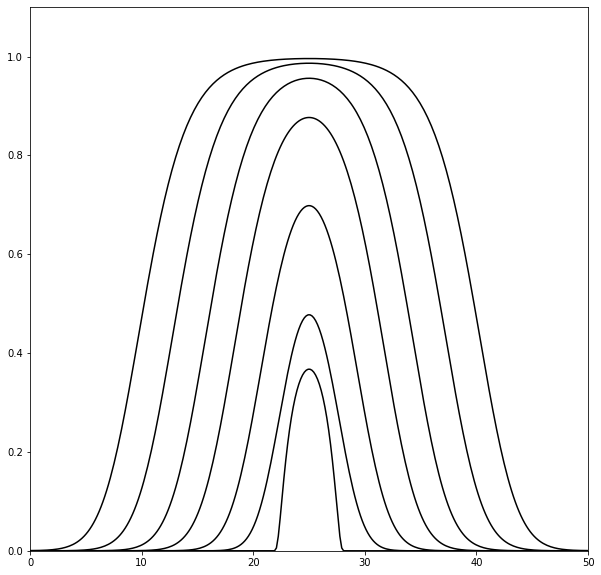

In [23]:
t_size = len(storage.data)
    
x = np.linspace(0, domain_size, grid_size)#x_size)
    
for t in np.linspace(0, t_size-1, 7):
    plt.plot(x,storage.data[int(t)][int(grid_size/2)], color='black')
    
plt.xlim([0,domain_size])
plt.ylim([0,1.1])    
plt.show()




In [8]:

def plot_wave3d(t):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = np.linspace(0,domain_size, result.data.shape[0])
    Y = np.linspace(0,domain_size, result.data.shape[1])
    X, Y = np.meshgrid(X, Y)
    Z = storage.data[t]
    ax.plot_surface(X, Y, Z, alpha=1)
    #ax.contour(X, Y, Z, cmap='binary')

    ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('u(t,x,y)')
    ax.set_zlim(0,1)
    plt.show()
    
widgets.interactive(plot_wave3d, t=widgets.IntSlider(min=0, max=max_time, step=1, value=0))


interactive(children=(IntSlider(value=0, description='t', max=10), Output()), _dom_classes=('widget-interact',…

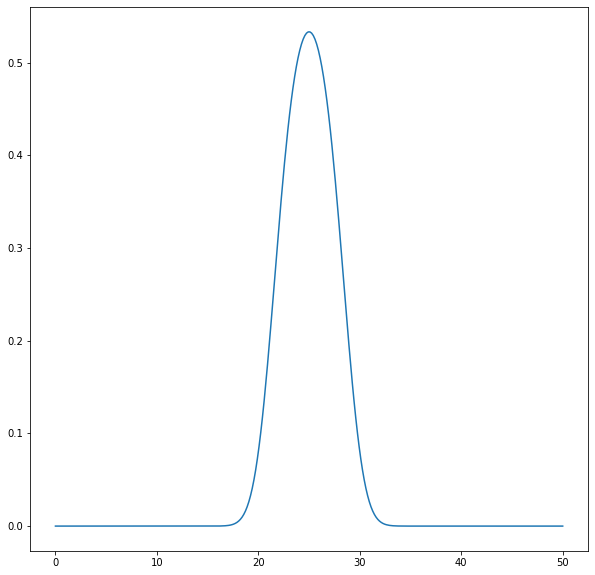

In [119]:
plt.plot(np.linspace(0,50,300),storage.data[100][int(grid_size/2)])

10


array([ 3.16666667,  3.5       ,  4.5       ,  5.66666667,  6.83333333,
        8.33333333,  9.83333333, 11.5       , 13.16666667, 14.83333333])

array([0.        , 0.00448281, 0.00325599, 0.00278733, 0.00252526,
       0.00240135, 0.00230672, 0.00225727, 0.00221377, 0.00217458])

<ipython-input-9-db875cce593a>:15: RuntimeWarning: divide by zero encountered in true_divide
  display(1/(4*s))


array([         inf,  55.76858647,  76.78145029,  89.69171808,
        98.99969727, 104.10817634, 108.37921145, 110.7534936 ,
       112.92962609, 114.96454012])

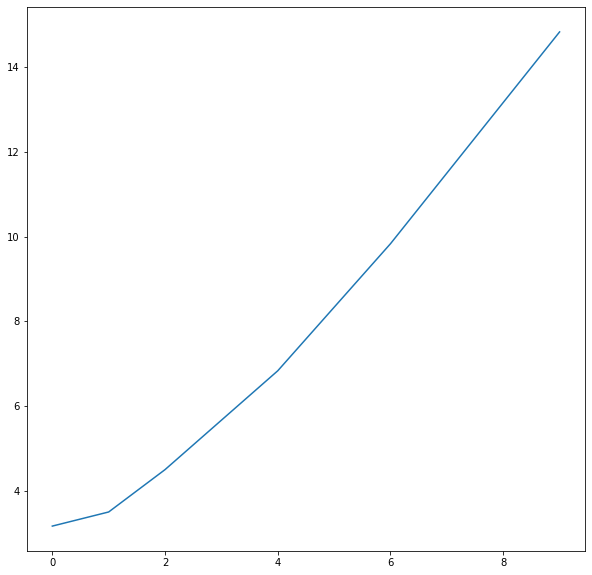

In [9]:
t_size = int((len(storage.data)-1)/10)
print(t_size)
r = np.zeros(t_size)
s = np.zeros(t_size)
c = np.zeros(t_size)
for i in range(0,t_size):
    aaa = storage.data[10*i][int(grid_size/2)]
    aaa = aaa[aaa > (np.max(aaa)/2)]
    r[i] = (len(aaa)*domain_size/grid_size)/2
    s[i] = (aaa[1]-aaa[0])/10
    
    
display(r)
display(s)
display(1/(4*s))
plt.plot(r)


In [10]:
1/(4*r)

array([0.07894737, 0.07142857, 0.05555556, 0.04411765, 0.03658537,
       0.03      , 0.02542373, 0.02173913, 0.01898734, 0.01685393])

In [11]:
aaa = storage.data[10*50][int(grid_size/2)]
plt.plot(aaa)
plt.show()

aaa = aaa[aaa > (np.max(aaa)/2)]
plt.plot(aaa)
plt.show()

rrr = len(aaa)*domain_size/grid_size
print(rrr)

IndexError: list index out of range

**TODO:**

- analýza stacionárních bodů
- jak je to s rychlostí $c$ ve vlnové proměnné $\boldsymbol{x}-ct$? Jak se závislostí na r nebo (x,y)?


- zkusit řešit přímo radiálně symetrickou rovnici $u_t = u_{rr} + \frac{1}{r} u_r + u(1-u)$
- jak ale pracovat s polárníma počátečníma podmínkama? Nebo stačí vlastně jen čtverec, protože už sama rovnice je v polárkách


100
Graf závislosti šířky vlny proti času


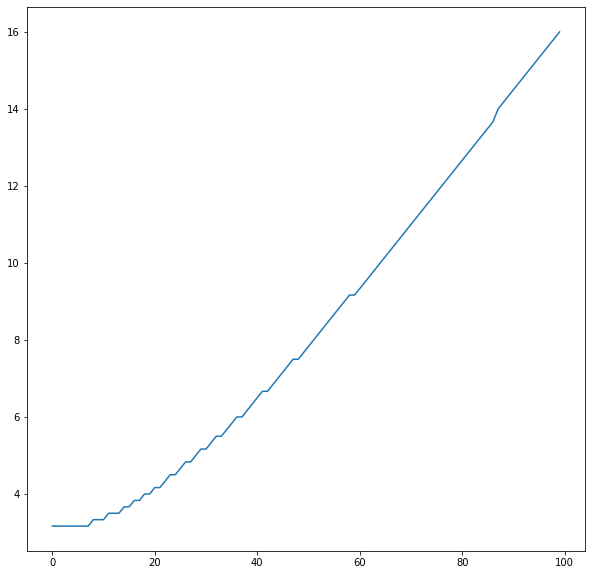

Graf derivace předchozí křivky (na prd)


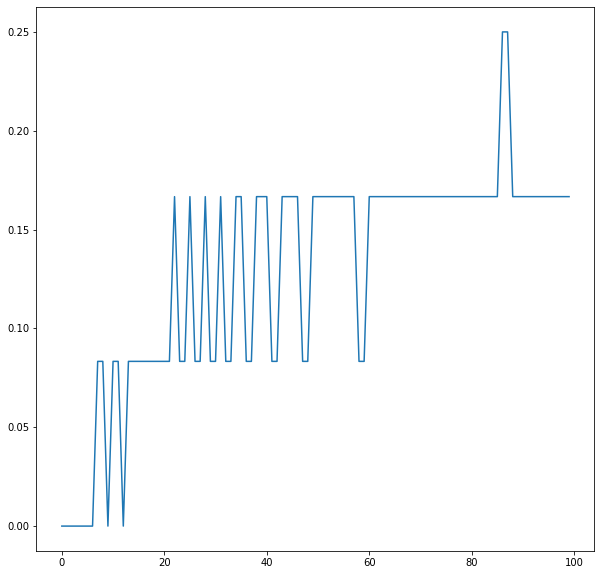

Graf splinu (5.stupně) proloženého body


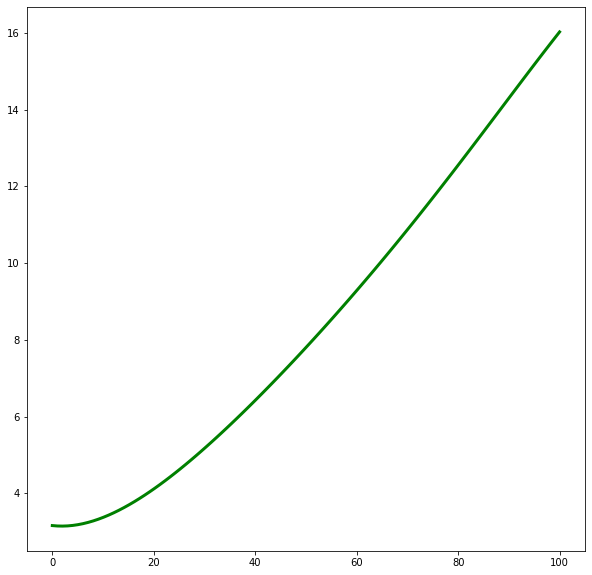

Graf derivace splinu (5.stupně) proloženého body


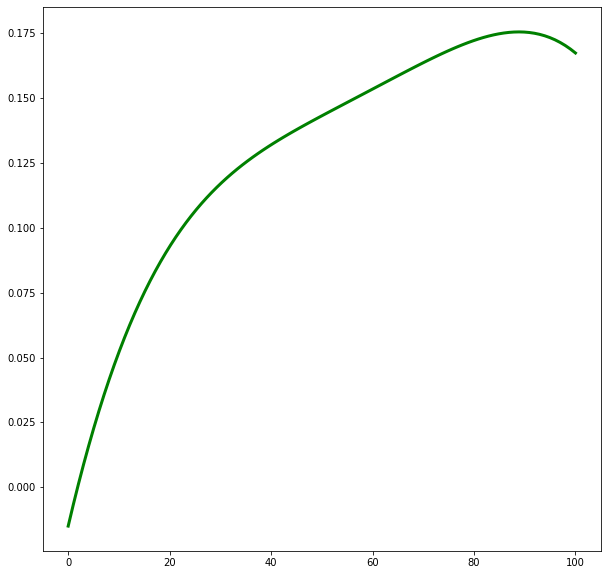

Graf rychlosti c vypočtené jako 1/(4*der)
2.0295895298573403


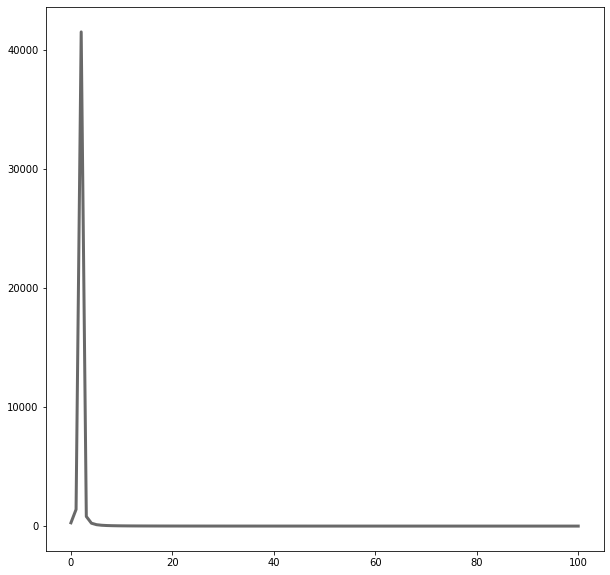

In [198]:
t_size = len(storage.data)-1
print(t_size)
r = np.zeros(t_size)
for i in range(0,t_size):
    # nebrat to u paty, ale někde uprostřed vejšky
    aaa = storage.data[i][int(grid_size/2)]
    value_at_middle = aaa[int(len(aaa)/2)]
    r[i] = len(aaa[aaa>value_at_middle/2])*domain_size/(2*grid_size)# stred #int(grid_size/2) - np.where(abs(storage.data[i][int(grid_size/2)]) > .2)[0][0] 
print('Graf závislosti šířky vlny proti času')
plt.plot(r)
plt.show()

print('Graf derivace předchozí křivky (na prd)')
plt.plot(np.gradient(r))
plt.show()

x = np.linspace(0, len(r), len(r))
y = r

xnew = np.linspace(x[0], x[-1], 100)

z = np.polyfit(x,y,5)
p = np.poly1d(z)
print('Graf splinu (5.stupně) proloženého body')
plt.plot(xnew, p(xnew), 'green', linewidth=3)
plt.show()
p = p.deriv()
print('Graf derivace splinu (5.stupně) proloženého body')
plt.plot(xnew, p(xnew), 'green', linewidth=3)
plt.show()

print('Graf rychlosti c vypočtené jako 1/(4*der)')
c = (1/(4*p(xnew)))**2 #### !!!!!!!!!!!! ta mocnina tu nemá co dělat, ale vychází to s ní.
print(np.min(c))
plt.plot(xnew, c, 'dimgray', linewidth=3)

plt.show()

0.5330137510094793


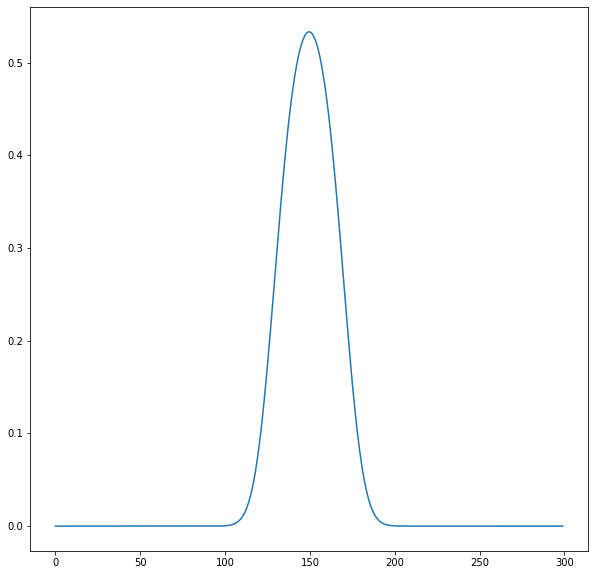

In [153]:
aaa = storage.data[100][int(grid_size/2)]
plt.plot(aaa)
value_at_middle = aaa[int(len(aaa)/2)]
print(value_at_middle)
#r[i] = len(aaa[aaa>value_at_middle/2])*domain_size/grid_size

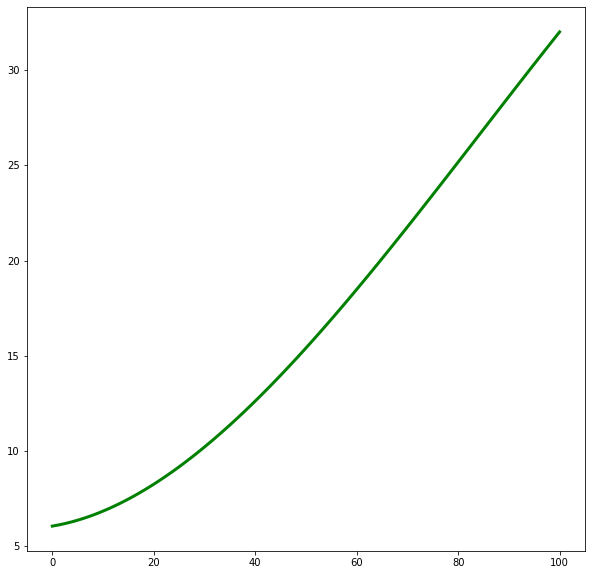

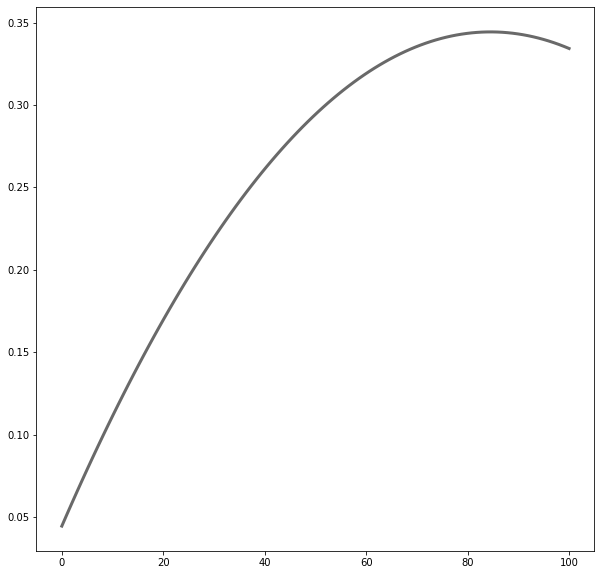

In [130]:
x = np.linspace(0, len(r), len(r))
y = r

xnew = np.linspace(x[0], x[-1], 100)

z = np.polyfit(x,y,3)
p = np.poly1d(z)
plt.plot(xnew, p(xnew), 'green', linewidth=3)
plt.show()
p = p.deriv()


plt.plot(xnew, p(xnew), 'dimgray', linewidth=3)

plt.show()

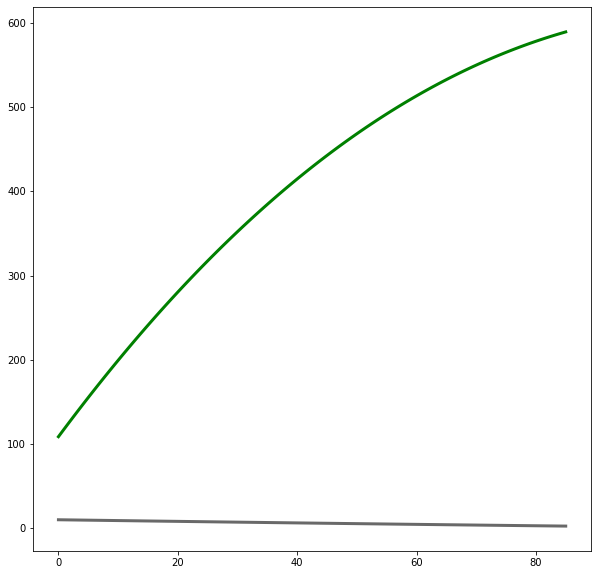

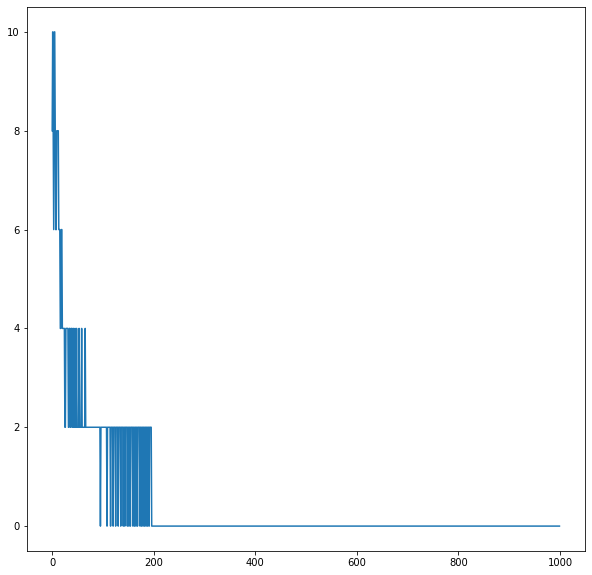

In [60]:
plt.plot(np.gradient(r)*4)

In [57]:
np.gradient(r)*4

array([ 8., 10.,  8.,  6., 10.,  8.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  2.,  2.,  4.,  2.,  2.,  4.,  2.,
        2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,
        2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,
        2.,  0.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  0.,
        2.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,
        0.,  2.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,
        2.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,
        2.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,
        2.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,
        0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,
        2.,  0.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  2

In [61]:
np.where(abs(storage.data[2][int(grid_size/2)]) > 0.00001)

(array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180]),)